<a href="https://colab.research.google.com/github/joel1979/Algorithmic-Trading/blob/master/Simple_Neural_Network_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network on MNIST Dataset
This Colab notebook demonstrates how to create a simple neural network using TensorFlow and Keras, trained on the MNIST dataset.

In [1]:
# Step 1: Set Up Environment
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


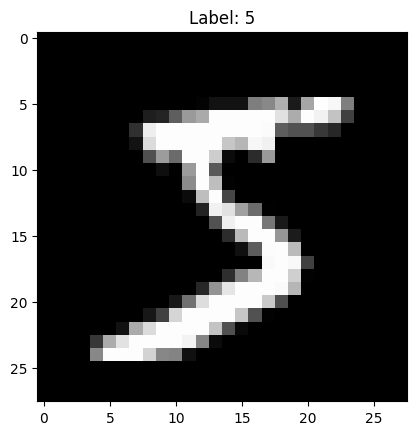

In [3]:
# Step 3: Visualize Sample Data
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [4]:
# Step 4: Build the Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Step 6: Train the Model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8778 - loss: 0.4331 - val_accuracy: 0.9588 - val_loss: 0.1369
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9646 - loss: 0.1211 - val_accuracy: 0.9666 - val_loss: 0.1087
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9776 - loss: 0.0770 - val_accuracy: 0.9699 - val_loss: 0.0995
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9835 - loss: 0.0551 - val_accuracy: 0.9726 - val_loss: 0.0865
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9869 - loss: 0.0453 - val_accuracy: 0.9750 - val_loss: 0.0808


In [7]:
# Step 7: Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9709 - loss: 0.0938

Test accuracy: 0.9750


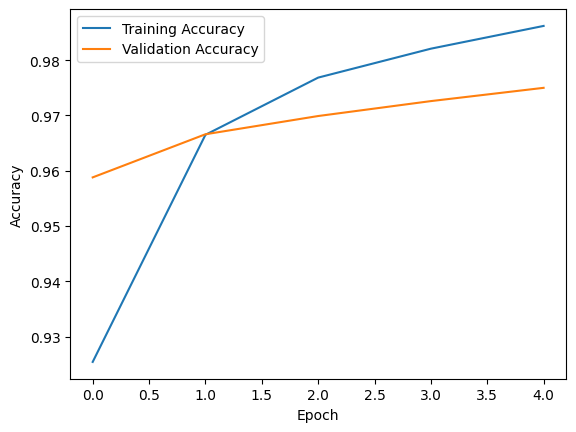

In [8]:
# Step 8: Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


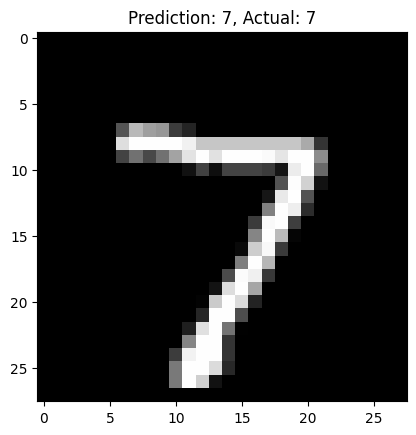

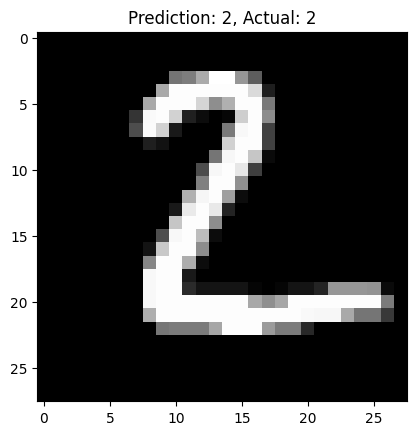

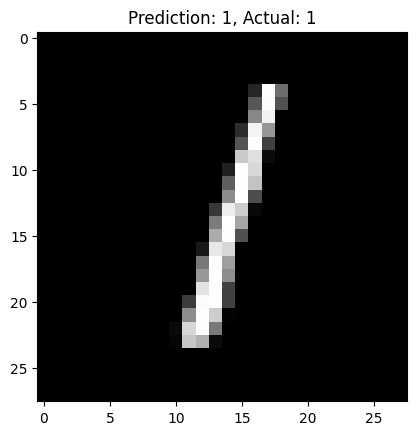

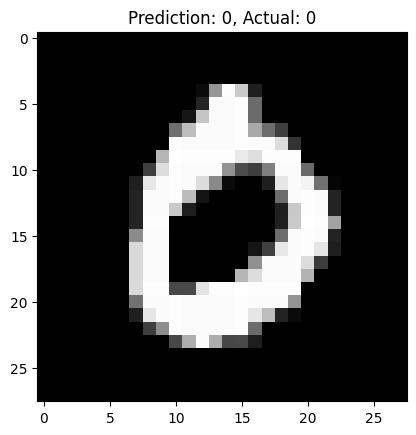

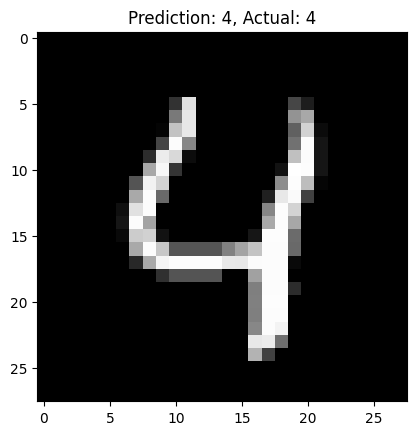

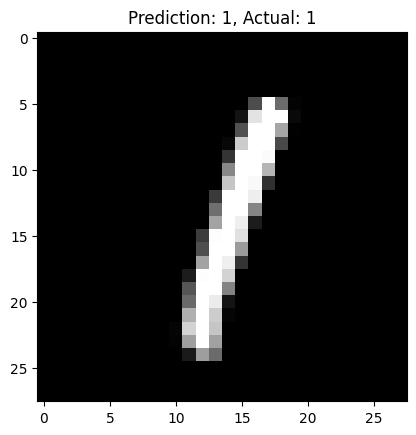

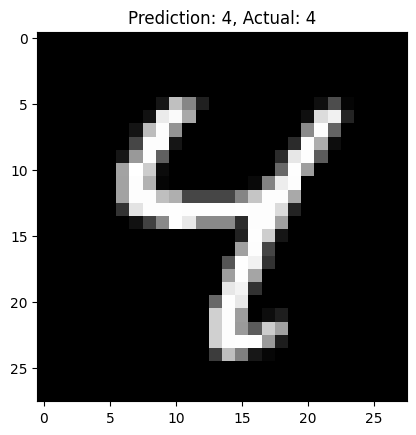

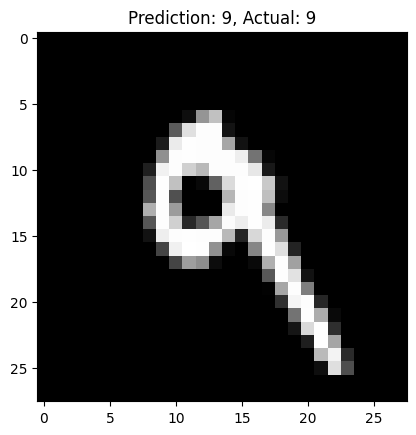

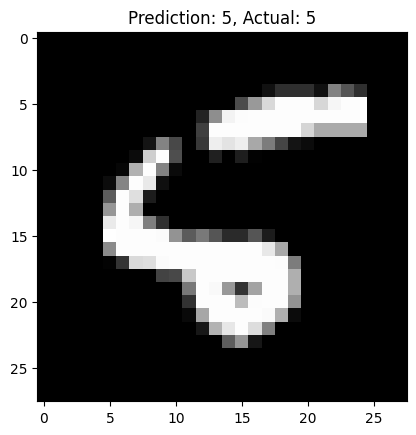

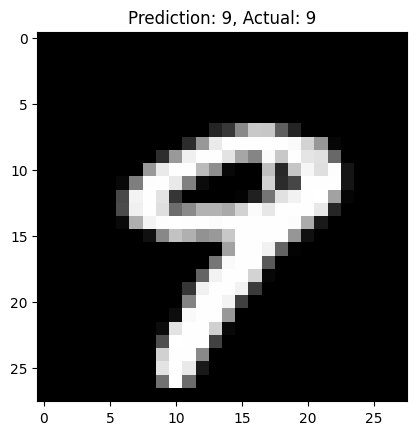

In [9]:
# Step 9: Make Predictions
predictions = model.predict(x_test[:10])
for i in range(10):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Prediction: {predictions[i].argmax()}, Actual: {y_test[i]}")
    plt.show()